# (1)데이터 가져오기
- 터미널에서 `~/data/data/bike-sharing-demand`경로에 `train.csv` 데이터를 train변수로 가져오기

In [1]:
import pandas as pd
import os
train_csv_path = os.getenv('HOME')+'/data/data/bike-sharing-demand/train.csv'
df = pd.read_csv(train_csv_path)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# (2) `datetime` 컬럼을 `datetime` 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [2]:
#datetime 자료형으로 변환
df["datetime"] = pd.to_datetime(df["datetime"])

#연, 월, 일,시, 분, 초 6가지 컬럼 추가(생성)하기
df['year'] = df['datetime'].dt.year         # 연(4자리숫자)
df['month'] = df['datetime'].dt.month        # 월(숫자)

df['day'] = df['datetime'].dt.day          # 일(숫자)
df['hour'] = df['datetime'].dt.hour         # 시(숫자)
df['minute'] = df['datetime'].dt.minute       # 분(숫자)
df['second'] = df['datetime'].dt.second       # 초(숫자)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# (3)  year, month, day, hour, minute, second 데이터 개수 시각화하기

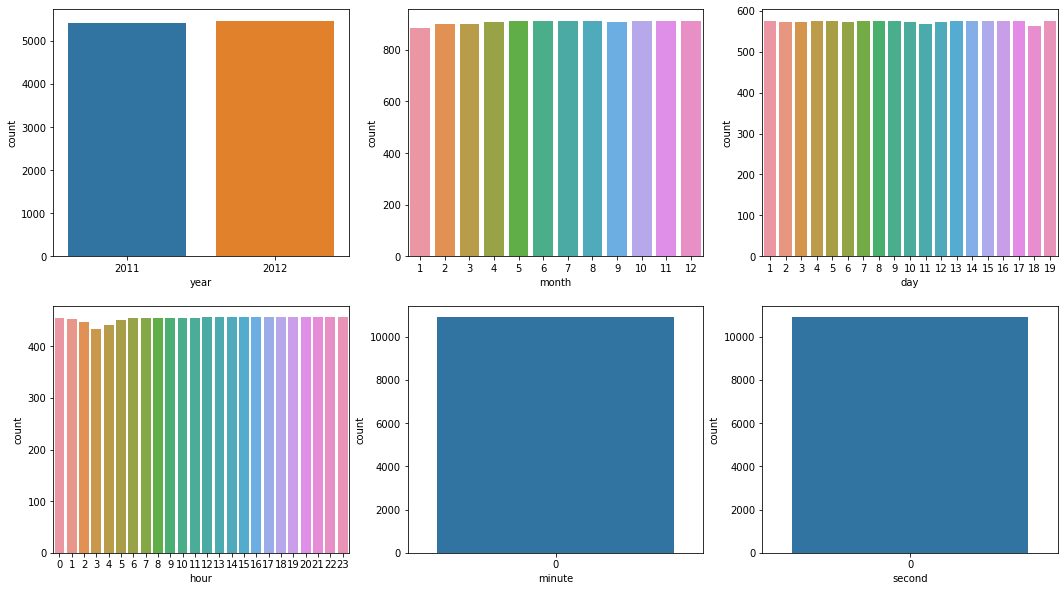

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3 )
figure.set_size_inches(18,10)

sns.countplot(data=df, x = "year", ax = ax1)
sns.countplot(data=df, x = "month", ax = ax2)
sns.countplot(data=df, x = "day", ax = ax3)
sns.countplot(data=df, x = "hour",  ax = ax4)
sns.countplot(data=df, x = "minute", ax = ax5)
sns.countplot(data=df, x = "second", ax = ax6)
plt.show()

# (4) X, y 컬럼 선택 및 train/test 데이터 분리
- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기


In [4]:
# 자전거 타기에 중요한 요소, 날씨, 온도, 체감온도, 습도, 주말유무, 시간대, 자전거 대여 횟수
features = ['weather', 'temp', 'atemp', 'humidity','windspeed', 'holiday', 'hour', 'count']
new_df = pd.DataFrame()

for feature in features:
    new_df[feature] = df[feature]

# new_df에 결측치(null) 확인
new_df.isnull().any()

weather      False
temp         False
atemp        False
humidity     False
windspeed    False
holiday      False
hour         False
count        False
dtype: bool

In [5]:
X = new_df.drop('count', axis=1)
y = new_df.iloc[:,[-1]]

#Tain/Test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
print(X_train.head())
print(X_train.shape)

       weather   temp   atemp  humidity  windspeed  holiday  hour
613          1   9.02   9.090        32    39.0007        0    17
4030         1  22.14  25.760        68    12.9980        0    23
3582         1  26.24  28.790        83     0.0000        0     4
10101        1   9.02  11.365        69     8.9981        0     6
1430         3  13.12  14.395        81    30.0026        0    11
(7620, 7)


In [7]:
print(y_train.head())
print(y_train.shape)

       count
613      176
4030      54
3582       8
10101    149
1430      19
(7620, 1)


In [8]:
from sklearn.linear_model import LinearRegression

# Scikit-learn에서 LinerRegression 모델을 선정한다.
model = LinearRegression()
# 7개의 Feature를 가진 X_train과 정답(count) y_train을 넣어 학습(fit) 시킨다.
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# X_test 데이터에 대한 예측값을 구한다.
predictions = model.predict(X_test)
# 시각화를 위해 X_test 데이터프레임에 predictions 컬럼을 추가한다.
X_test['predictions'] = predictions

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- x_test 예측값 출력하기
- 손실함수 값 계산하기
- MSE,RMSE값도 함께 계산하기

In [10]:
from sklearn.metrics import mean_squared_error
# y_test(정답)과 predictions(위에서 구한 모델 예측 값)를 MSE, RMSE를 통해 비교한다.
mse = mean_squared_error(y_test, predictions)
RMSE = mse ** 0.5
print(mse, RMSE)

22194.98503553214 148.97981418813805


# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

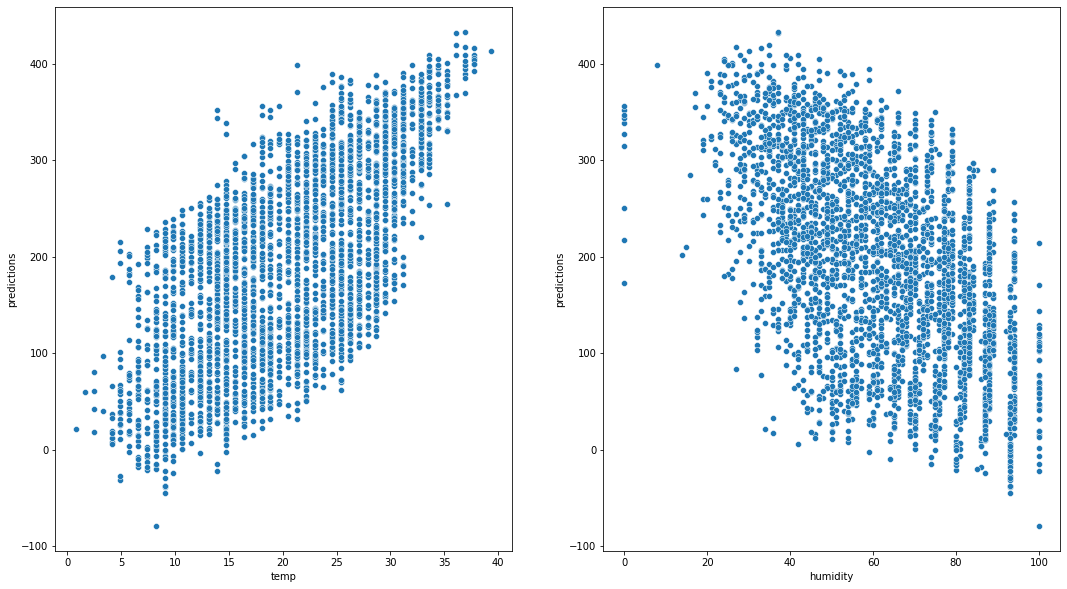

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18,10)

#축에 temp, y축에
sns.scatterplot(data=X_test, x='temp', y='predictions', ax=ax1)
sns.scatterplot(data=X_test, x='humidity', y='predictions', ax=ax2)
plt.show()